<a href="https://colab.research.google.com/github/snehaangeline/Lora/blob/main/LoRa_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Exploration

In [ ]:
df = pd.read_excel("/content/tim lorawan dataset.xlsx")


In [ ]:
df.shape

(622, 7)

In [ ]:
df.head()

,DEVICE ID,RSSI,SNR,FREQ,SPREADING FACTOR,BW,AIR TIME
0,2,-115,-16.5,868100000,12,125,00:00
1,29,-113,-12.5,868100000,12,125,00:00:08
2,20,-114,-13.0,868100000,12,125,00:00:13
3,5,-115,-8.5,868500000,12,125,00:00:08
4,43,-114,-4.8,868100000,12,125,00:00:08


In [ ]:
df = df.rename(columns={"SPREADING FACTOR":"SPREAD","DEVICE ID":"ID",'AIR TIME ':"TIME"})

In [ ]:
df.columns

Index(['ID', 'RSSI', 'SNR', 'FREQ', 'SPREAD', 'BW', 'TIME'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      622 non-null    int64  
 1   RSSI    622 non-null    int64  
 2   SNR     622 non-null    float64
 3   FREQ    622 non-null    int64  
 4   SPREAD  622 non-null    int64  
 5   BW      622 non-null    int64  
 6   TIME    622 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 34.1+ KB


In [ ]:
df.isnull().sum()

ID        0
RSSI      0
SNR       0
FREQ      0
SPREAD    0
BW        0
TIME      0
dtype: int64

In [ ]:
df.drop(['BW',"TIME"], axis=1, inplace=True)

In [ ]:
df["SPREAD"].unique()

array([12, 11,  9, 10,  8,  7])

In [ ]:
df['ID'].unique()

array([ 2, 29, 20,  5, 43, 31,  3, 25, 37, 11, 45, 14,  4, 38, 44, 10, 40,
       18, 35, 33,  7, 12, 13, 19, 24, 30,  1, 46, 16, 22,  8, 42, 27, 17,
       47, 28, 50,  6, 21, 39, 41, 15, 23, 26, 48, 49,  9, 34, 32, 36])

In [ ]:
len(df['ID'].unique())

50

In [ ]:
df.drop(df.index[367],axis = 0,inplace = True)

Data Preprocessing

In [ ]:
X = df.iloc[:,1:5]

In [ ]:
cols = X.columns

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)
# X = pd.DataFrame(scaled_features, columns=[cols])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
X = pca.fit_transform(X)

. K-Means model with two clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-1.37198068e+05, -4.70986429e-02],
       [ 1.67087647e+05,  5.73594186e-02]])

In [ ]:
import warnings

warnings.filterwarnings('ignore')

Elbow Value

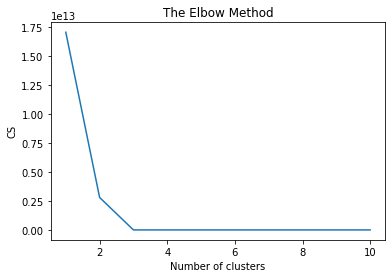

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [ ]:
label = kmeans.fit_predict(X)

In [ ]:
df["cluster"] = list(label)

In [ ]:
df["cluster"].unique()

array([0, 1, 2], dtype=int32)

In [ ]:
df

,ID,RSSI,SNR,FREQ,SPREAD,cluster
0,2,-115,-16.5,868100000,12,0
1,29,-113,-12.5,868100000,12,0
2,20,-114,-13.0,868100000,12,0
3,5,-115,-8.5,868500000,12,1
4,43,-114,-4.8,868100000,12,0
...,...,...,...,...,...,...
617,49,-114,-12.3,868100000,9,0
618,15,-114,-12.3,868100000,9,0
619,5,-117,-14.0,868100000,9,0
620,16,-115,-12.5,868100000,9,0


Visualization

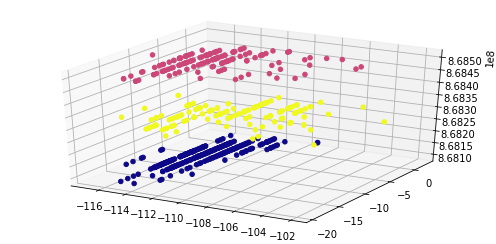

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df.RSSI
y = df.SNR
z = df.FREQ
c = df.cluster
img = ax.scatter(x, y, z, c=c, cmap='plasma', alpha=1)
plt.show()

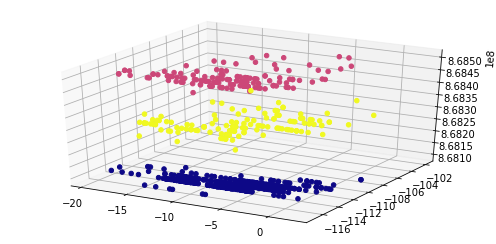

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df.SNR
y = df.RSSI
z = df.FREQ
c = df.cluster
img = ax.scatter(x, y, z, c=c, cmap='plasma', alpha=1)
plt.show()

Evaluation Metrics

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
round(score,1)

1.0